Weather Dataset

This dataset is a weather dataset from 2021 in Wisconsin. It contains data from a multitude of weather stations throughout Wisconsin. We chose this set to determine the question of how does the amount of percipitation in a day effect the depth of snow. As well as the question of how many days in a year was snow possible according to the average temperature. These are important because of understanding percipitation data for things like saftey. Knowing how percipitation can effect depth of the snow can inform descisions like road conditions and if you may need to stock up on essentials. For looking at amount of days where snow is possible. It allows us to examine that, although we place alot of emphasis on how cold it is here, we may want to prioritize different things over being prepared for snowfall. It also poses the beginning to the idea of global warming effecting our climate. If we can see a significant decline of our days where snow is possible we can tell if we are heading towards the decline of snow type percipitation. In 2001 there was 139 days where snow was possible. This data set will tell us if the number has gone up or down.

In [23]:
##Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [24]:
##Read the CSV file and print dataframe
wdf = pd.read_csv('WiscoWeather.csv')
wdf.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TAVG,WESD,WESF,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
0,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-01,NaN,NaN,0.00,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-02,NaN,NaN,0.00,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-03,NaN,NaN,0.00,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-04,NaN,NaN,0.00,0.0,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-05,NaN,NaN,0.02,0.3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
##clean data by removing unnecessary columns
wdf = wdf.drop(['DAPR', 'MDPR', 'WESD', 'WESF', 'WT01','WT02','WT03','WT04','WT05','WT06','WT08','WT09','WT11', 'SNOW'], axis=1)

In [26]:
##Show cleaned frame
wdf.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TAVG
0,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-01,0.00,0.0,2.0,NaN
1,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-02,0.00,0.0,2.0,NaN
2,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-03,0.00,0.0,2.0,NaN
3,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-04,0.00,0.0,1.5,NaN
4,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-05,0.02,0.3,2.0,NaN


In [27]:
##Grab any row where there was snow recorded and creating a DF with the snow depth and Percipitation
ndf= wdf.loc[wdf['SNWD'] > 0]
ndf = ndf[['SNWD', 'PRCP']]

In [28]:
##show successful cleaning
ndf.head()

,SNWD,PRCP
0,2.0,0.00
1,2.0,0.00
2,2.0,0.00
3,1.5,0.00
4,2.0,0.02


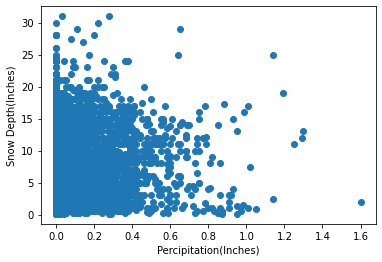

In [29]:
##Basic scatter of data compared
plt.scatter(ndf['PRCP'], ndf['SNWD'])
plt.xlabel('Percipitation(Inches)')
plt.ylabel('Snow Depth(Inches)')
plt.show()

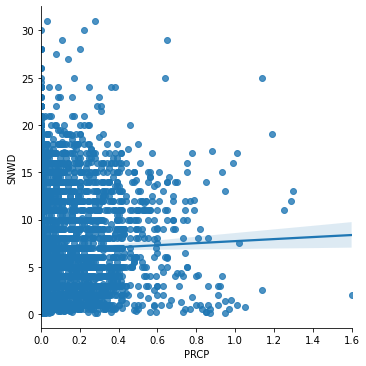

In [33]:
##Plot regression line
sns.lmplot(x='PRCP',y= 'SNWD',data=ndf,fit_reg=True) 

In [ ]:
##Question 2
##Remove null values in the dataframe and drop all duplicates of date to get a average temperature for each date
tdf = wdf.drop(['SNWD'], axis=1)
tdf = tdf.dropna()
tdf = tdf.drop_duplicates(['DATE'])

In [ ]:
##Create a column where the vaue is true when there is possible snow and 
# false if there is no possibility for snow
tdf['PBSN'] = np.where(tdf['TAVG'] < 32, True, False)


In [ ]:
##Display results of test
tdf['PBSN'].value_counts()

PBSN
False    281
True      84
Name: count, dtype: int64